In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("../Data/Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
len(data)

200

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop("CustomerID",axis=1,inplace=True)

In [13]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
data.drop("Gender",axis=1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


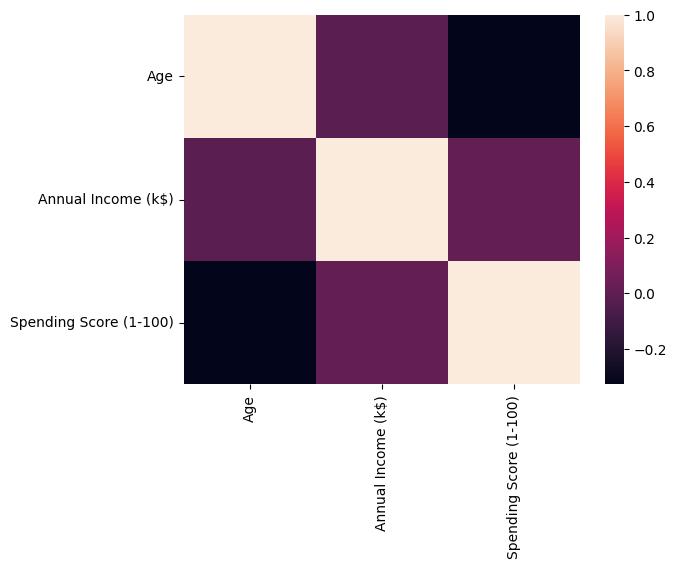

In [15]:
sns.heatmap(data.drop("Gender",axis=1).corr());

### There is little to no correlation between the features, hence they are scattered randomly, perfect for clustering technqiues

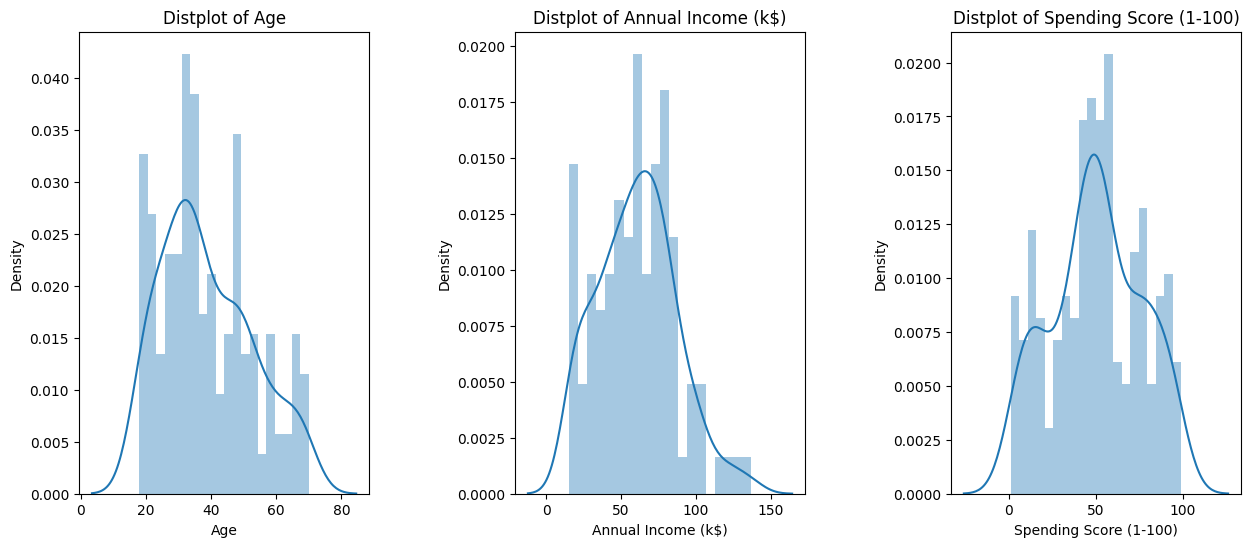

In [16]:
#Distplot to view density of values across its distribution for numerical data
plt.figure(figsize=(15,6))
n=0
for x in data.columns[1:]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],bins=20)
    plt.title(f"Distplot of {x}")
plt.show()    

### Most people lie in the age group 30-40, Most people earn about 75k $ while people having spending score of 50 is maximum

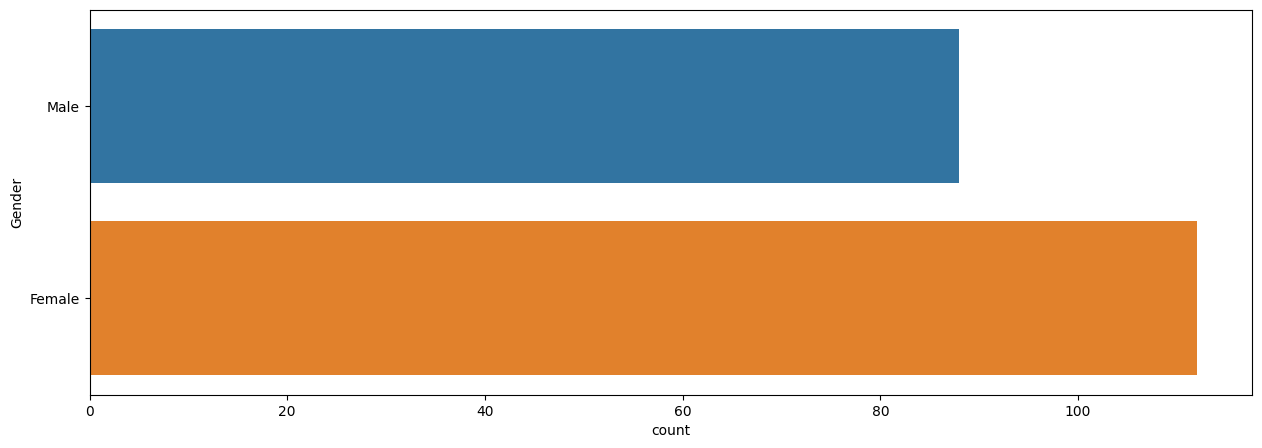

In [17]:
#countplot for categorical values
plt.figure(figsize=(15,5))
sns.countplot(y=data["Gender"],hue=data["Gender"])
plt.show()

### There are more Female than Men in the dataset

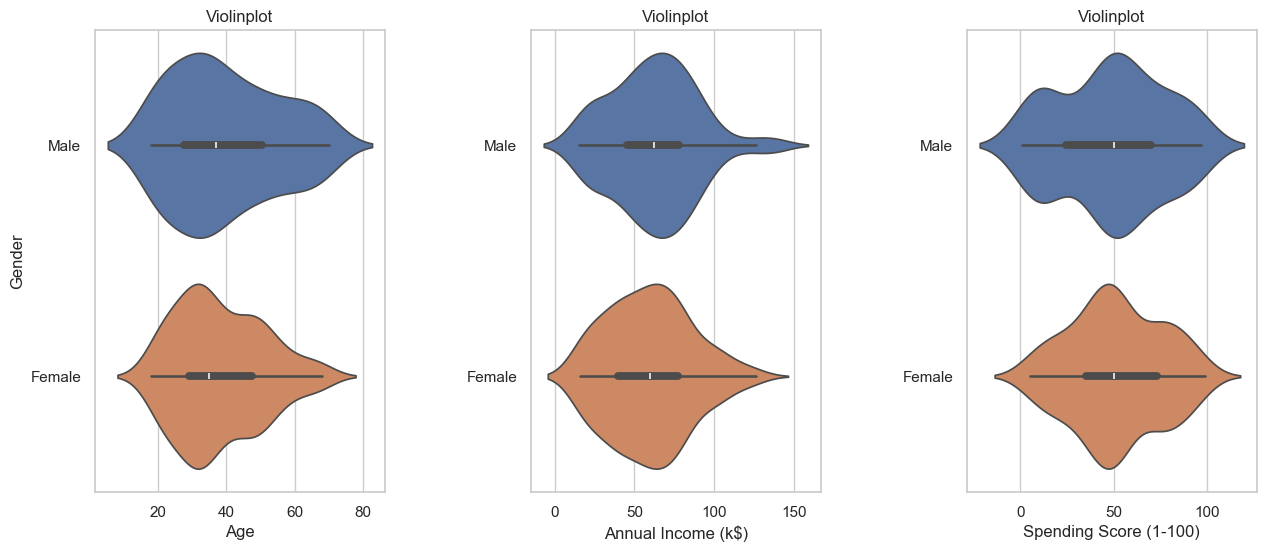

In [18]:
#Violin plot for categorizing the distribution for Gender
plt.figure(figsize=(15,6))
n=0
for x in data.columns[1:]:
    n+=1
    sns.set_theme(style="whitegrid")
    plt.subplot(1,3,n)
    
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=data[x],y=data["Gender"],hue=data["Gender"])
    plt.ylabel("Gender" if n==1 else "")
    plt.title(f"Violinplot")
plt.show()    

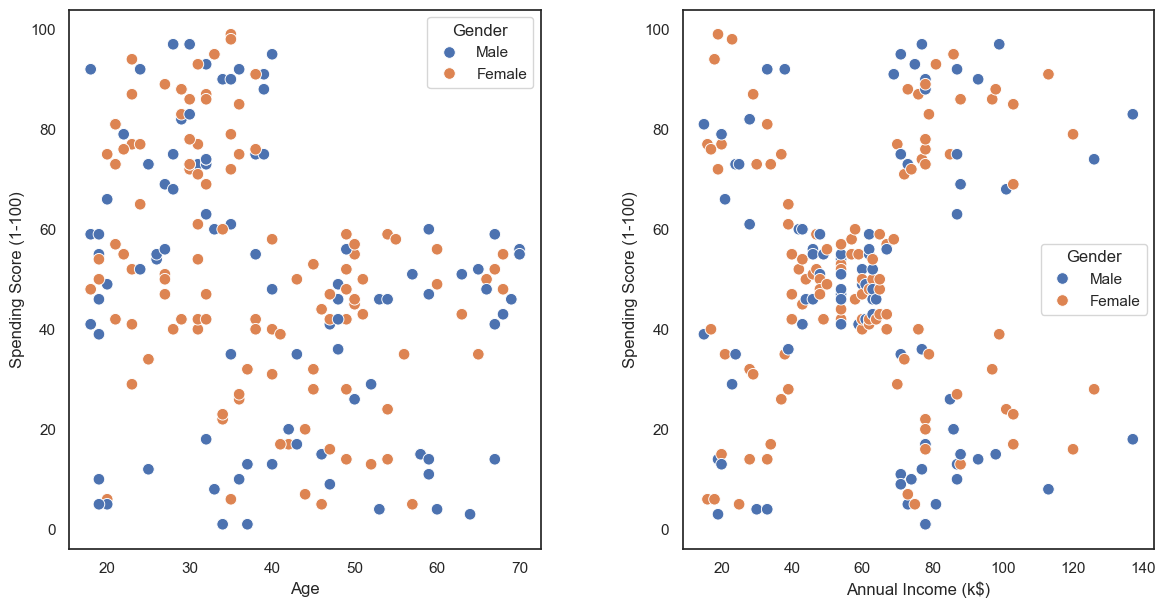

In [19]:
#Scatterplot to understand the distribution of points in the dataset
plt.figure(figsize=(14,7))
sns.set_style("white")
plt.subplot(1,2,1)

sns.scatterplot(x=data["Age"],y=data["Spending Score (1-100)"],hue=data["Gender"],s=70)
plt.subplots_adjust(hspace=0.2,wspace=0.3)
plt.subplot(1,2,2)
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],hue=data["Gender"],s=70)

plt.show()

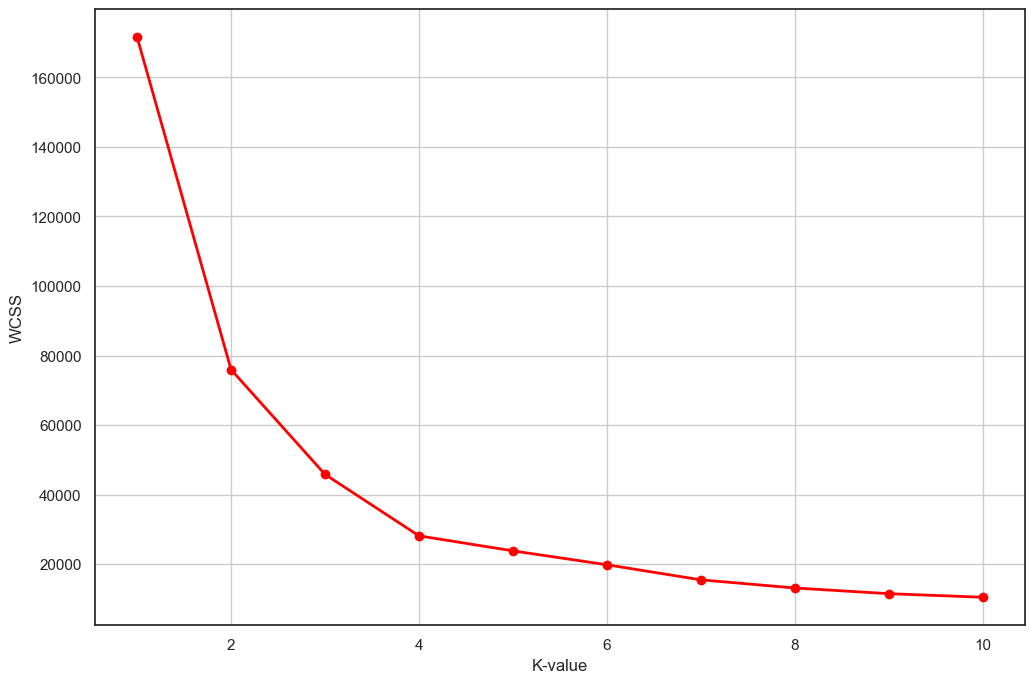

In [20]:
#Analyzing relationship between age and spending score
X1=data.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1,11),wcss,marker="o",color="red",linewidth=2)
plt.xlabel("K-value")
plt.ylabel("WCSS")
plt.show()


### Elbow Curve for finding optimum value of K


In [21]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)


print("Total clusters",max(label)+1)
print("Cluster Centers",kmeans.cluster_centers_)
print("Labels",kmeans.labels_)

Total clusters 4
Cluster Centers [[43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]
Labels [3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 3 3 0 2 3 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0
 2 0 2 1 2 1 3 0 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 2 3 2 1 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 3 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 3
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


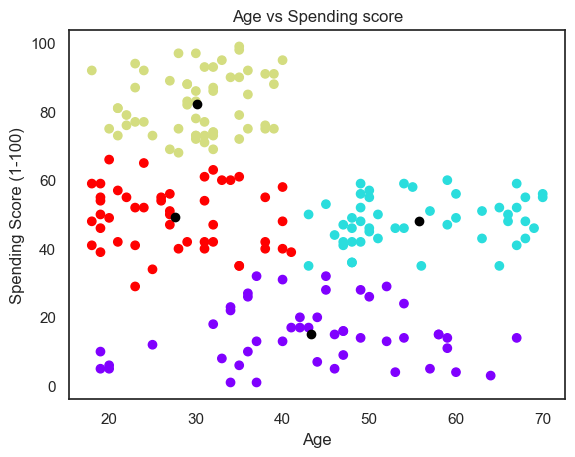

In [22]:
plt.scatter(X1[:,0],X1[:,1],c=label,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending score")
plt.show()

### Relationship between Age and Spending Score with cluster centers in black and different clusters in different colors

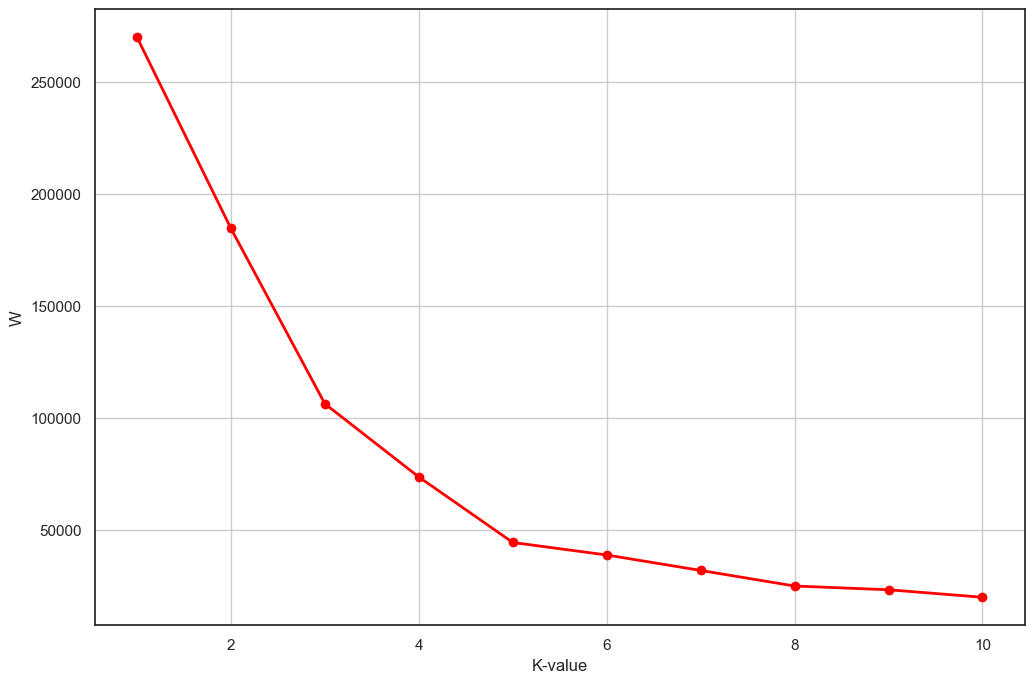

In [23]:
X2=data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1,11),wcss,marker="o",color="red",linewidth=2)
plt.xlabel("K-value")
plt.ylabel("W")
plt.show()


In [24]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)


print("Total clusters",max(label)+1)
print("Cluster Centers",kmeans.cluster_centers_)
print("Labels",kmeans.labels_)

Total clusters 5
Cluster Centers [[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
Labels [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


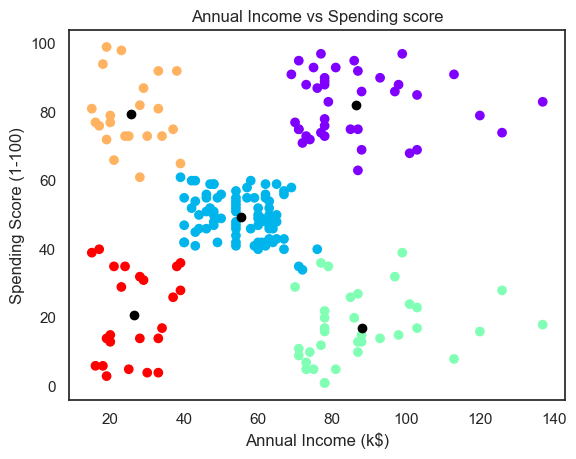

In [25]:
plt.scatter(X2[:,0],X2[:,1],c=label,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending score")
plt.show()

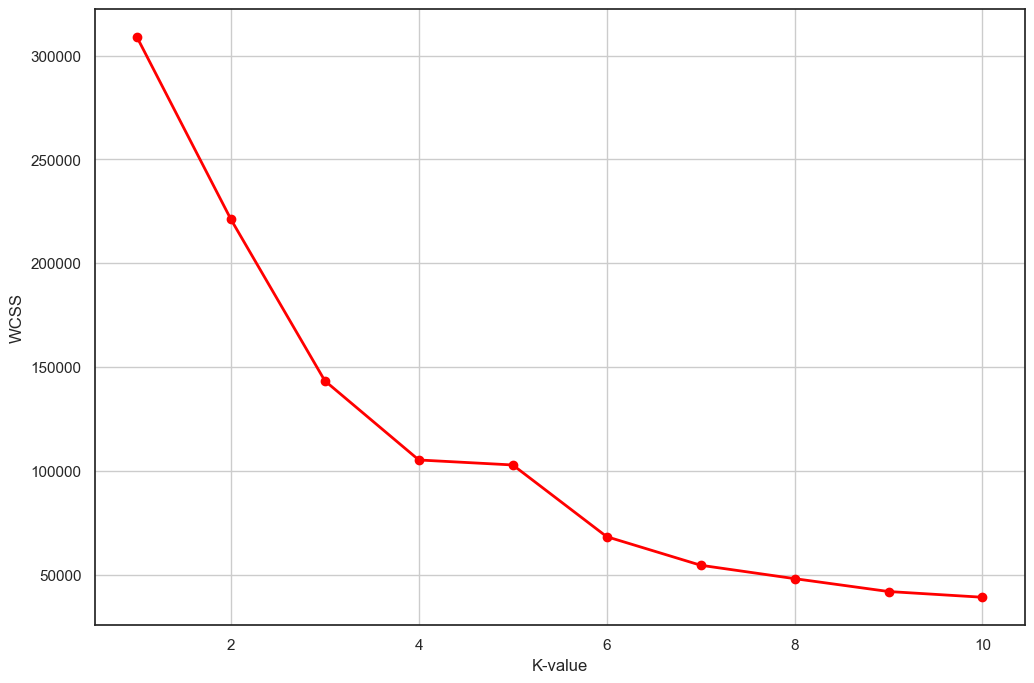

In [26]:
X3=data.iloc[:,1:]
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1,11),wcss,marker="o",color="red",linewidth=2)
plt.xlabel("K-value")
plt.ylabel("WCSS")
plt.show()

In [27]:
kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(X3)


print("Total clusters",max(label)+1)
print("Cluster Centers",kmeans.cluster_centers_)
print("Labels",kmeans.labels_)

Total clusters 6
Cluster Centers [[ 33.         114.71428571  78.42857143]
 [ 42.9375      55.0875      49.7125    ]
 [ 25.27272727  25.72727273  79.36363636]
 [ 40.66666667  87.75        17.58333333]
 [ 45.2173913   26.30434783  20.91304348]
 [ 32.625       80.375       82.9375    ]]
Labels [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 5 3 5 1 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 1 5 3 5 3 5
 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [28]:
clusters= kmeans.fit_predict(X3)
data["Label"]=clusters
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


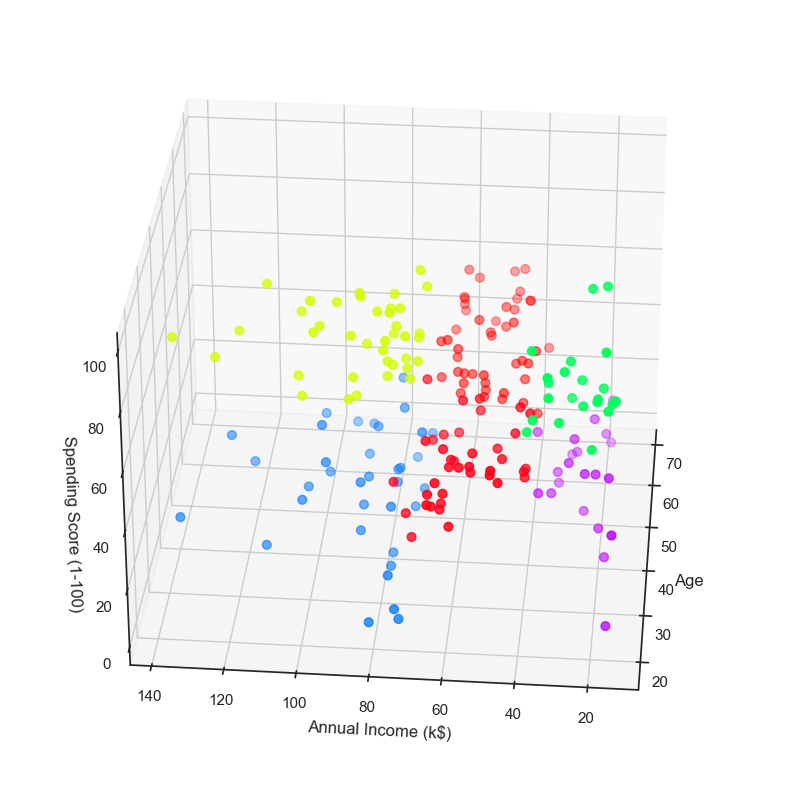

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data.Age,data["Annual Income (k$)"],data["Spending Score (1-100)"],c=data["Label"],cmap="hsv",s=40)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

### One hot encoding on Gender and converting it to Numeric value for feeding it to model

In [30]:
X=data.iloc[:,:-1]
X=pd.get_dummies(X)
X=X.drop("Gender_Male",axis=1)
X["Gender_Female"]=X["Gender_Female"].astype(int)
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
#Scaling the data


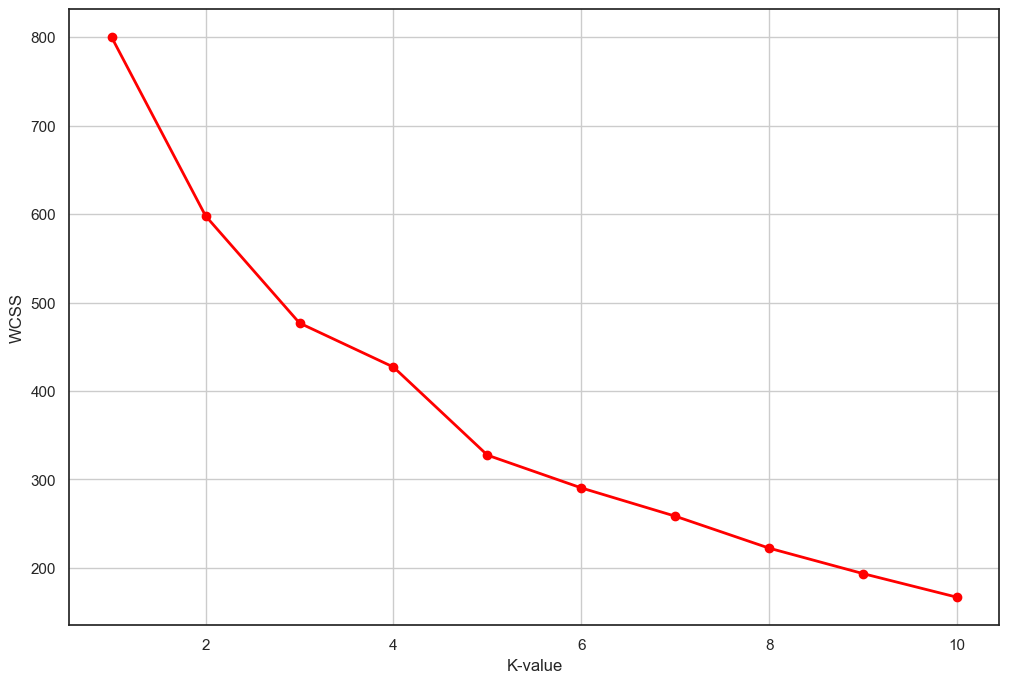

In [33]:

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1,11),wcss,marker="o",color="red",linewidth=2)
plt.xlabel("K-value")
plt.ylabel("WCSS")
plt.show()

In [34]:
kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(X_scaled)


print("Total clusters",max(label)+1)
print("Cluster Centers",kmeans.cluster_centers_)
print("Labels",kmeans.labels_)
print("The Wcss of model",kmeans.inertia_)

Total clusters 6
Cluster Centers [[-0.96863923 -1.12379781  0.50148322 -1.12815215]
 [-0.49160182  0.8059475   0.05046803 -1.12815215]
 [ 1.36044178 -0.24300382 -0.52621999 -1.12815215]
 [-0.90898178 -0.72449594  0.22925153  0.88640526]
 [-0.47793198  0.97284787  1.22158511  0.88640526]
 [ 0.72707781  0.0283174  -0.53954645  0.88640526]]
Labels [0 0 3 3 3 3 3 3 2 3 2 3 5 3 0 0 3 0 2 3 0 0 5 0 5 0 5 0 5 3 2 3 2 0 5 3 5
 3 5 3 5 0 2 3 5 3 5 3 3 3 5 0 3 2 5 2 5 2 3 2 2 0 5 5 2 0 5 5 0 3 2 5 5 5
 2 0 5 1 3 5 2 1 2 5 3 2 5 3 3 5 5 1 2 5 3 1 5 3 2 1 3 5 2 1 2 3 5 2 2 2 2
 3 5 1 3 3 5 5 5 5 1 5 5 1 3 4 1 1 2 1 2 1 3 4 1 4 5 1 1 4 5 1 3 4 1 1 2 4
 5 1 1 1 5 4 5 4 1 4 1 4 5 4 1 4 2 4 1 4 5 1 1 1 1 1 5 4 2 1 2 1 5 4 1 4 5
 1 5 1 5 4 5 4 1 4 5 4 5 1 1 1]
The Wcss of model 301.9247425872065


In [35]:
X["Label"]=kmeans.fit_predict(X_scaled)

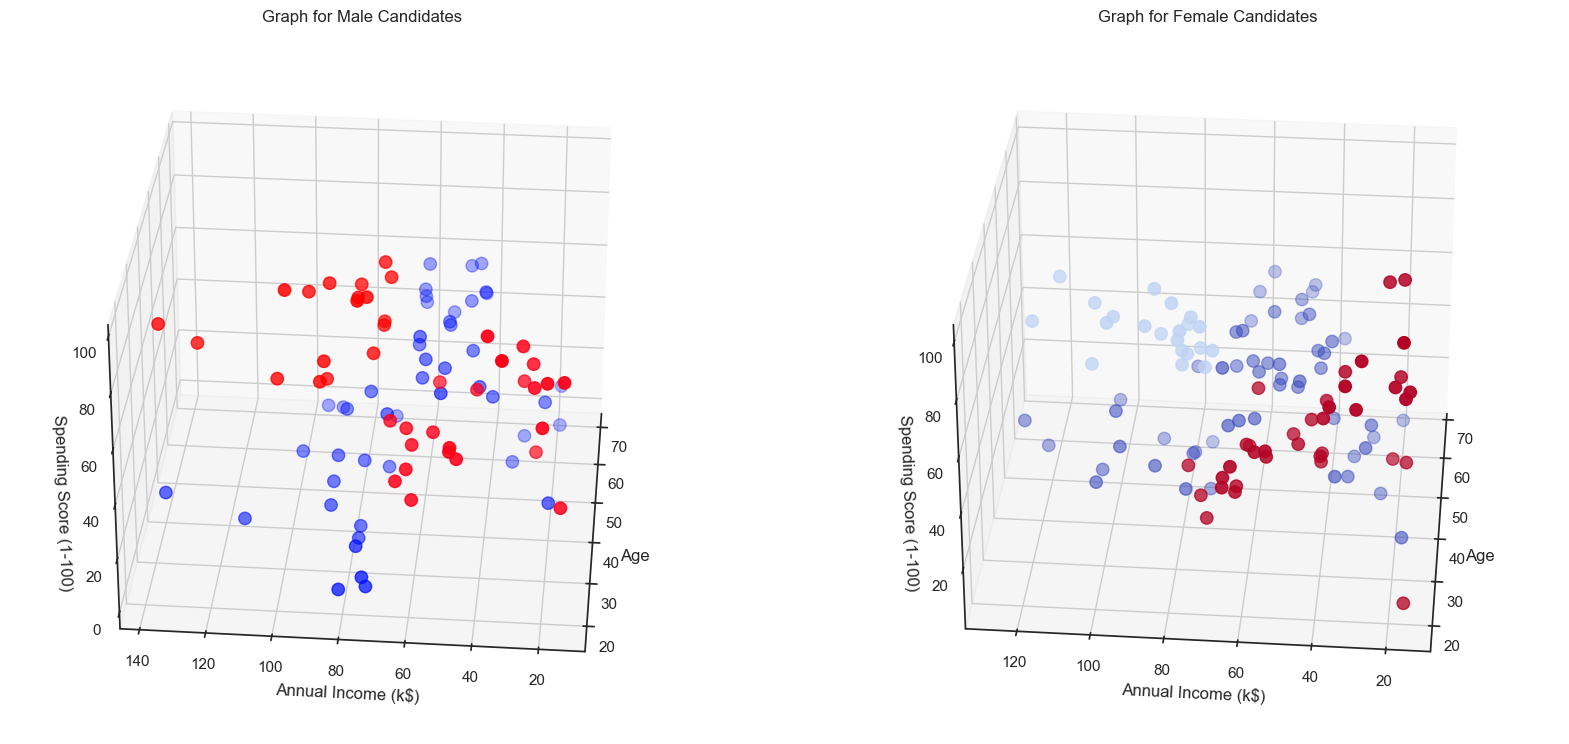

In [36]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(121,projection='3d')
X_male=X[X["Gender_Female"]==0]
ax.scatter(X_male.Age,X_male["Annual Income (k$)"],X_male["Spending Score (1-100)"],c=X_male["Label"],cmap="hsv",s=80)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Graph for Male Candidates")
ax1=fig.add_subplot(122,projection='3d')
X_female=X[X["Gender_Female"]==1]
ax1.scatter(X_female.Age,X_female["Annual Income (k$)"],X_female["Spending Score (1-100)"],c=X_female["Label"],cmap="coolwarm",s=80)
ax1.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax1.set_zlabel("Spending Score (1-100)")
ax1.set_title("Graph for Female Candidates")
plt.show()

## Pickling the model to build an interface

In [37]:
import pickle
import os

In [43]:
#pickling the model
path=r'../Models/Kmeans.pkl'
if not os.path.exists(path):
    with open(path,'wb') as modelfile:
        pickle.dump(kmeans,modelfile)

In [44]:
#pickling the scaler
path=r'../Models/KmeansScaler.pkl'
if not os.path.exists(path):
    with open(path,'wb') as modelfile:
        pickle.dump(scaler,modelfile)